# Dependencies


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import pyarrow.parquet as pa
import warnings
warnings.simplefilter('ignore')

In [4]:
table = pa.read_table('/Users/sm/Developer/Projects/Danish Residential Housing EDA/DKHousingPrices.parquet') 
df = table.to_pandas()

In [5]:
df.head()

,date,quarter,house_id,house_type,sales_type,year_build,purchase_price,%_change_between_offer_and_purchase,no_rooms,sqm,sqm_price,address,zip_code,city,area,region,nom_interest_rate%,dk_ann_infl_rate%,yield_on_mortgage_credit_bonds%
0,2024-10-26,2024Q4,0,Villa,regular_sale,1974,4350000,0.0,5,215.0,20232.558594,Kildevangen 5,8382,Hinnerup,East & mid jutland,Jutland,3.1,NaN,NaN
1,2024-10-26,2024Q4,2,Summerhouse,regular_sale,1956,450000,0.0,3,36.0,12500.000000,Lykkestien 2,4400,Kalundborg,Other islands,Zealand,3.1,NaN,NaN
2,2024-10-26,2024Q4,1,Farm,regular_sale,1955,6600000,0.0,3,180.0,36666.667969,Sæderupvej 58,9260,Gistrup,North jutland,Jutland,3.1,NaN,NaN
3,2024-10-25,2024Q4,3,Apartment,family_sale,1945,1495000,0.0,2,64.0,23359.375000,"Tage-Hansens Gade 5, 1. tv",8000,Aarhus C,East & mid jutland,Jutland,3.1,NaN,NaN
4,2024-10-25,2024Q4,4,Villa,regular_sale,1967,3375000,0.0,5,176.0,19176.136719,Chr.Winthers Vej 5,8600,Silkeborg,East & mid jutland,Jutland,3.1,NaN,NaN


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1507908 entries, 0 to 1507907
Data columns (total 19 columns):
 #   Column                               Non-Null Count    Dtype         
---  ------                               --------------    -----         
 0   date                                 1507908 non-null  datetime64[ns]
 1   quarter                              1507908 non-null  period[Q-DEC] 
 2   house_id                             1507908 non-null  int64         
 3   house_type                           1507908 non-null  category      
 4   sales_type                           1507908 non-null  category      
 5   year_build                           1507908 non-null  int16         
 6   purchase_price                       1507908 non-null  int32         
 7   %_change_between_offer_and_purchase  1507908 non-null  float32       
 8   no_rooms                             1507908 non-null  int8          
 9   sqm                                  1507906 non-null  fl

## Missing Values

In [7]:
df.isna().sum()

date                                      0
quarter                                   0
house_id                                  0
house_type                                0
sales_type                                0
year_build                                0
purchase_price                            0
%_change_between_offer_and_purchase       0
no_rooms                                  0
sqm                                       2
sqm_price                                 2
address                                   0
zip_code                                  0
city                                      0
area                                      0
region                                    0
nom_interest_rate%                        0
dk_ann_infl_rate%                      1193
yield_on_mortgage_credit_bonds%        1193
dtype: int64

In [8]:
df = df.dropna()

In [9]:
df.isnull().sum()

date                                   0
quarter                                0
house_id                               0
house_type                             0
sales_type                             0
year_build                             0
purchase_price                         0
%_change_between_offer_and_purchase    0
no_rooms                               0
sqm                                    0
sqm_price                              0
address                                0
zip_code                               0
city                                   0
area                                   0
region                                 0
nom_interest_rate%                     0
dk_ann_infl_rate%                      0
yield_on_mortgage_credit_bonds%        0
dtype: int64

In [10]:
df.shape

(1506713, 19)

# Exploratory Data Analysis 

#### DISTRIBUTION OF PURCHASE PRICE

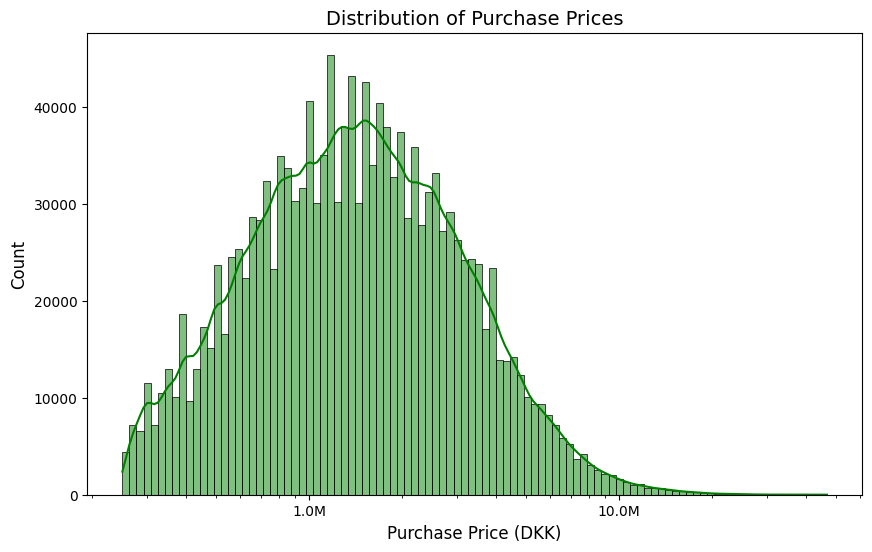

In [11]:
import matplotlib.ticker as ticker

plt.figure(figsize=(10, 6))
ax = sns.histplot(df['purchase_price'], bins=100, kde=True, color='green', log_scale=True)

# Format the x-axis to show millions with an 'M' suffix
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{x/1e6:.1f}M'))

plt.title('Distribution of Purchase Prices', fontsize=14)
plt.xlabel('Purchase Price (DKK)', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()

#### DISTRIBUTION OF HOUSE TYPE BY PRICE

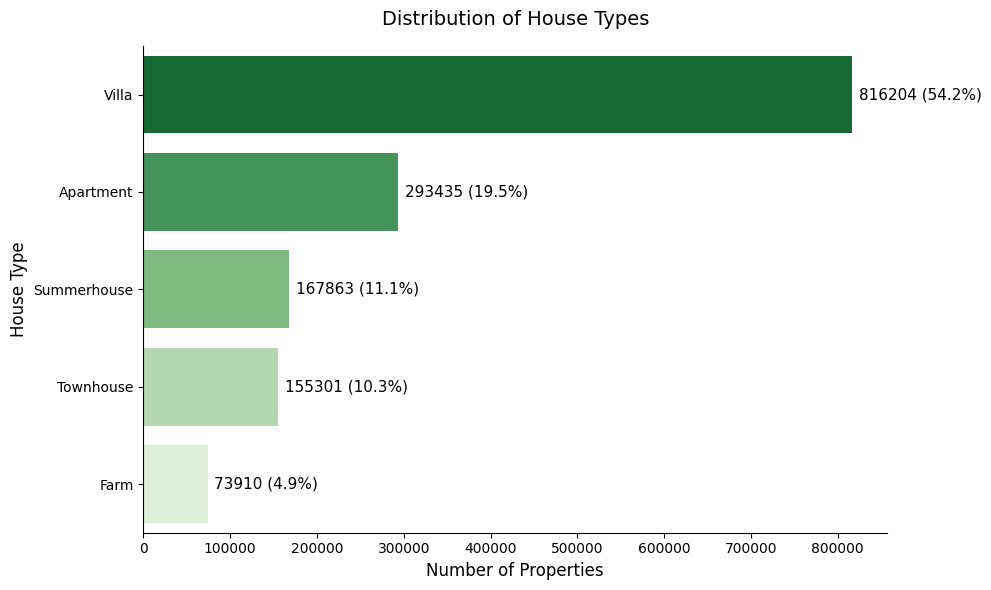

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))

house_order = df['house_type'].value_counts().index

ax = sns.countplot(data=df, y='house_type', order=house_order, color='green', palette="Greens_r")

# 3. Add counts and percentages as text on the bars
total = len(df)

for p in ax.patches:
    width = p.get_width()
    percentage = f'{100 * width / total:.1f}%'
    ax.annotate(f'{int(width)} ({percentage})', 
                (width, p.get_y() + p.get_height() / 2),
                xytext=(5, 0), textcoords='offset points', 
                ha='left', va='center', fontsize=11)

plt.title('Distribution of House Types', fontsize=14, pad=15)
plt.xlabel('Number of Properties', fontsize=12)
plt.ylabel('House Type', fontsize=12)

# 4. Clean up the styling
sns.despine() # Removes the box outline
plt.tight_layout()
plt.show()

# AVERAGE PURCHASE PRICE BY REGION

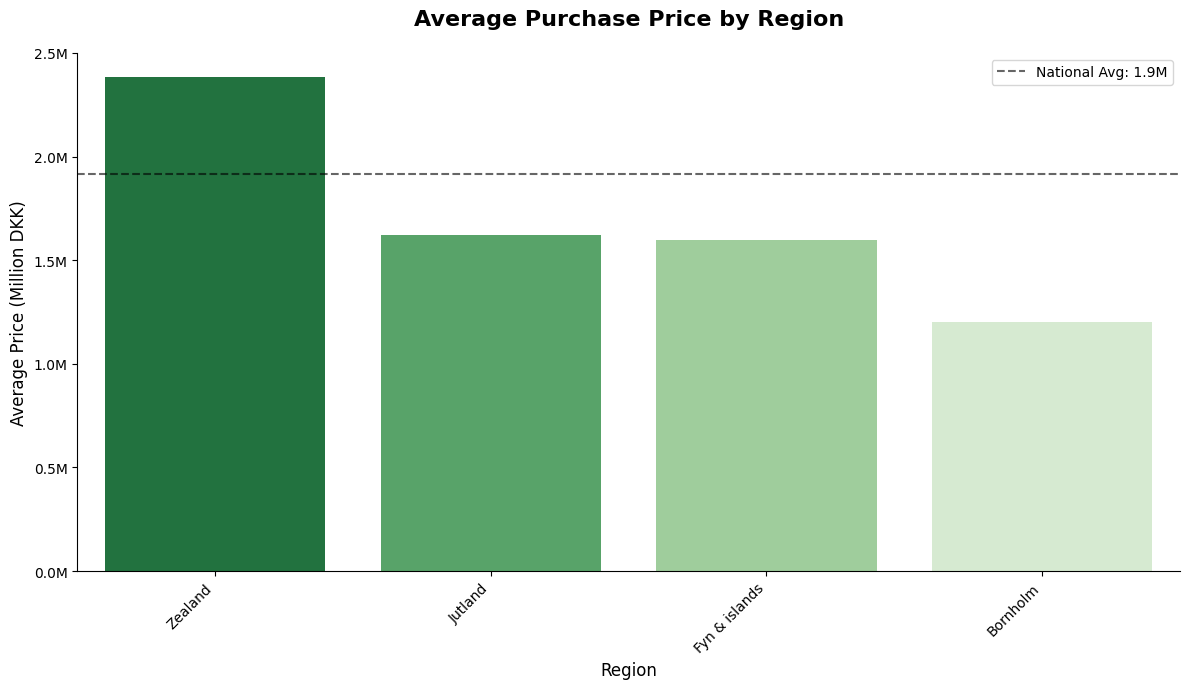

In [13]:
region_order = df.groupby('region')['purchase_price'].mean().sort_values(ascending=False).index

plt.figure(figsize=(12, 7))

ax = sns.barplot(
    data=df, 
    x='region', 
    y='purchase_price', 
    order=region_order,
    palette='Greens_r', 
    errorbar=None
)

# Format Y-axis to Millions for better readability
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{x/1e6:.1f}M'))

# Add the average price as a horizontal line for context
overall_avg = df['purchase_price'].mean()

plt.axhline(overall_avg, color='black', linestyle='--', alpha=0.6, label=f'National Avg: {overall_avg/1e6:.1f}M')

plt.title('Average Purchase Price by Region', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Region', fontsize=12)
plt.ylabel('Average Price (Million DKK)', fontsize=12)
plt.xticks(rotation=45, ha='right') # 'ha' aligns the labels better when rotated
plt.legend()

sns.despine()
plt.tight_layout()
plt.show()

# DISTRIBUTION OF SQM AND PURCHASE PRICE

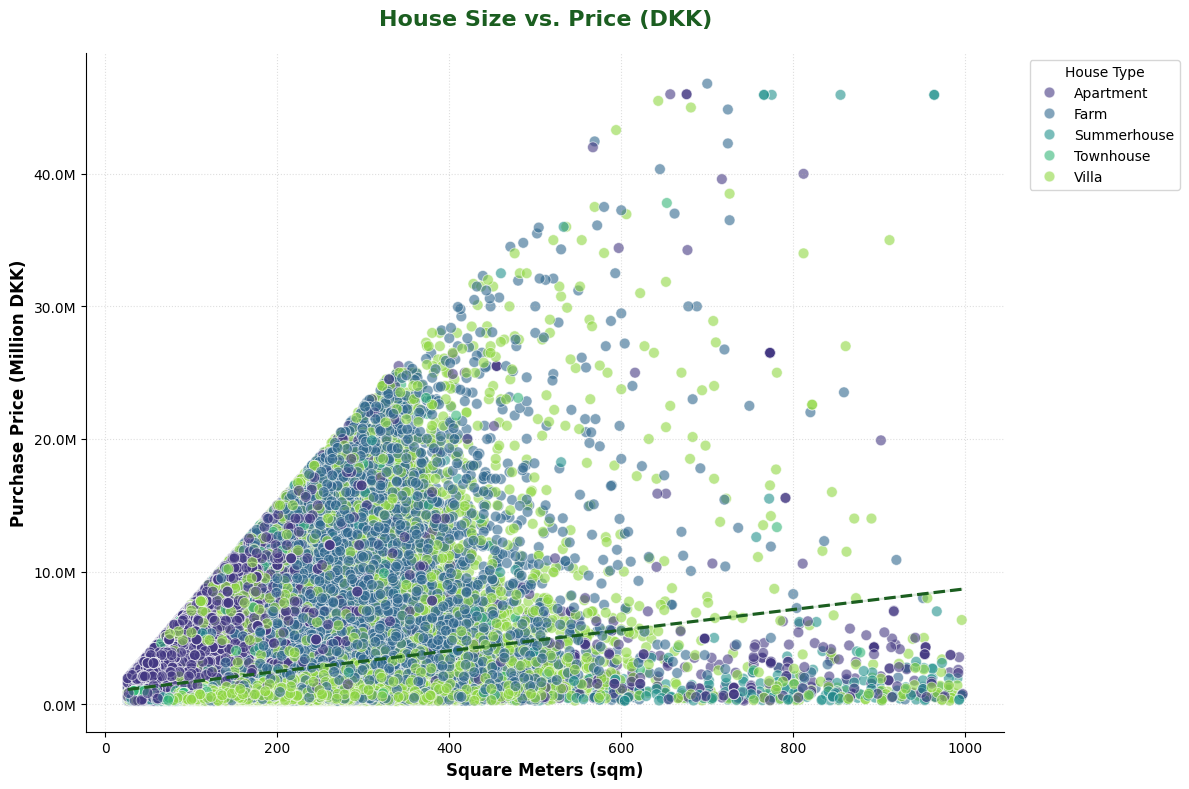

In [14]:
plt.figure(figsize=(12, 8))

ax = sns.scatterplot(
    data=df, 
    x='sqm', 
    y='purchase_price', 
    hue='house_type', 
    palette='viridis', 
    alpha=0.6,         
    edgecolor='w',     
    s=60               
)

# Fix the Price Axis (Million DKK)
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{x/1e6:.1f}M'))

sns.regplot(
    data=df, x='sqm', y='purchase_price', 
    scatter=False, color='#1b5e20', line_kws={'linestyle':'--'}
)

# Styling & Theme
plt.title('House Size vs. Price (DKK)', fontsize=16, fontweight='bold', pad=20, color='#1b5e20')
plt.xlabel('Square Meters (sqm)', fontsize=12, fontweight='semibold')
plt.ylabel('Purchase Price (Million DKK)', fontsize=12, fontweight='semibold')

# Move legend to a place where it doesn't block data
plt.legend(title='House Type', bbox_to_anchor=(1.02, 1), loc='upper left', frameon=True)

sns.despine()
plt.grid(True, linestyle=':', alpha=0.4)
plt.tight_layout()
plt.show()

# DISTRIBUTION OF SQM PRICE BY HOUSE TYPE

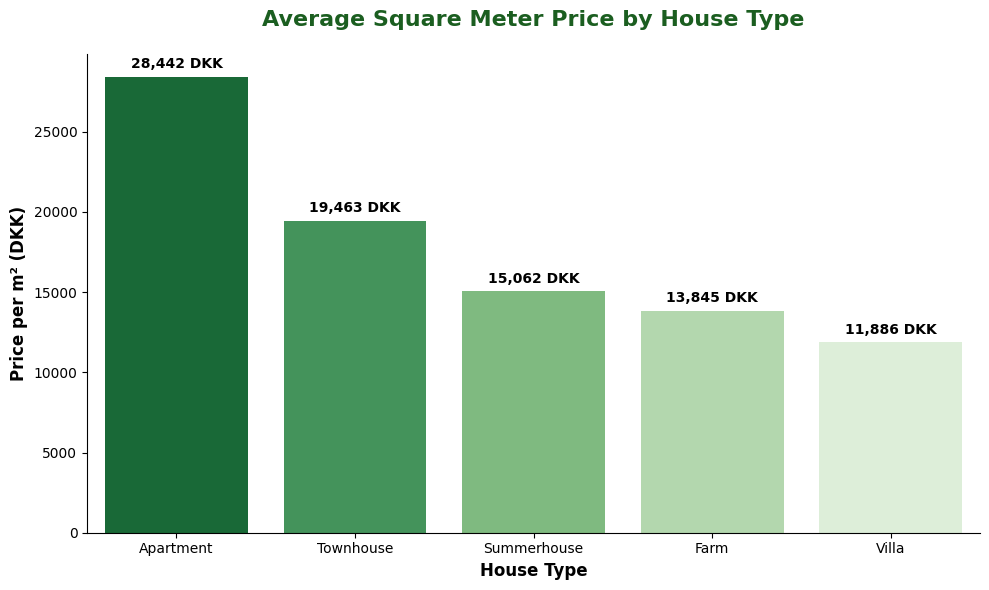

In [21]:
sqm_order = df.groupby('house_type')['sqm_price'].mean().sort_values(ascending=False).index

plt.figure(figsize=(10, 6))

ax = sns.barplot(
    data=df, 
    x='house_type', 
    y='sqm_price', 
    order=sqm_order, 
    palette='Greens_r', 
    legend=False,
    errorbar=None
)

for p in ax.patches:
    ax.annotate(f'{int(p.get_height()):,} DKK', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                xytext=(0, 9), 
                textcoords='offset points',
                fontsize=10,
                fontweight='bold')

plt.title('Average Square Meter Price by House Type', fontsize=16, fontweight='bold', pad=20, color='#1b5e20')
plt.xlabel('House Type', fontsize=12, fontweight='semibold')
plt.ylabel('Price per m² (DKK)', fontsize=12, fontweight='semibold')

sns.despine()
plt.tight_layout()
plt.show()

# DISTRIBUTION OF PURCHASE PRICE BY SALES TYP

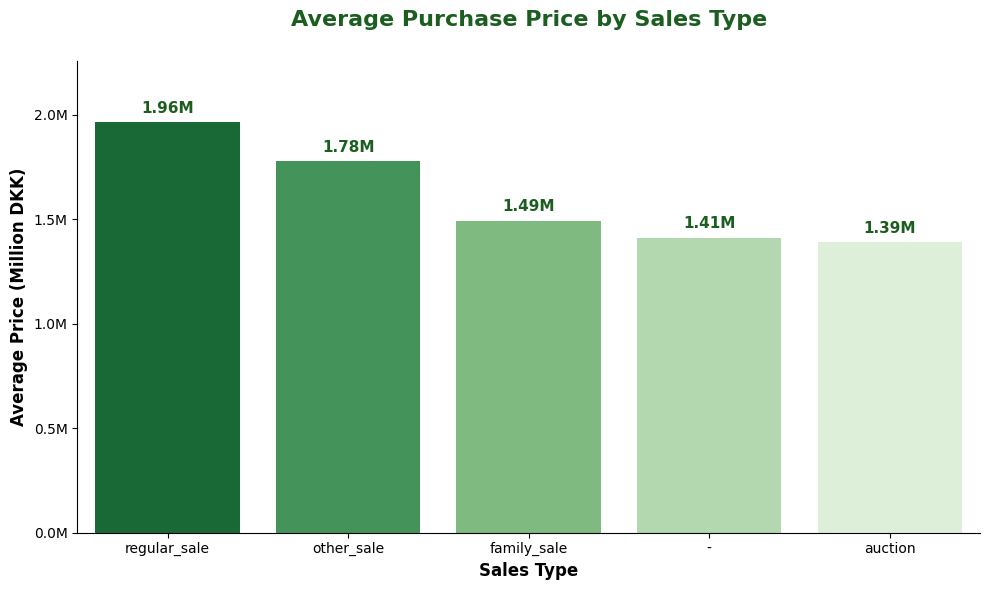

In [20]:
sales_order = df.groupby('sales_type')['purchase_price'].mean().sort_values(ascending=False).index

plt.figure(figsize=(10, 6))

# 2. Use your Greens_r theme
ax = sns.barplot(
    data=df, 
    x='sales_type', 
    y='purchase_price', 
    order=sales_order,
    palette='Greens_r', 
    legend=False,
    errorbar=None
)

ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{x/1e6:.1f}M'))

for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height/1e6:.2f}M', 
                (p.get_x() + p.get_width() / 2., height), 
                ha='center', va='center', 
                xytext=(0, 10), 
                textcoords='offset points',
                fontsize=11, fontweight='bold', color='#1b5e20')

plt.title('Average Purchase Price by Sales Type', fontsize=16, fontweight='bold', pad=25, color='#1b5e20')
plt.xlabel('Sales Type', fontsize=12, fontweight='semibold')
plt.ylabel('Average Price (Million DKK)', fontsize=12, fontweight='semibold')

plt.ylim(0, df.groupby('sales_type')['purchase_price'].mean().max() * 1.15)

sns.despine()
plt.tight_layout()
plt.show()

# DISTRIBUTION FOR NUMBER OF ROOMS


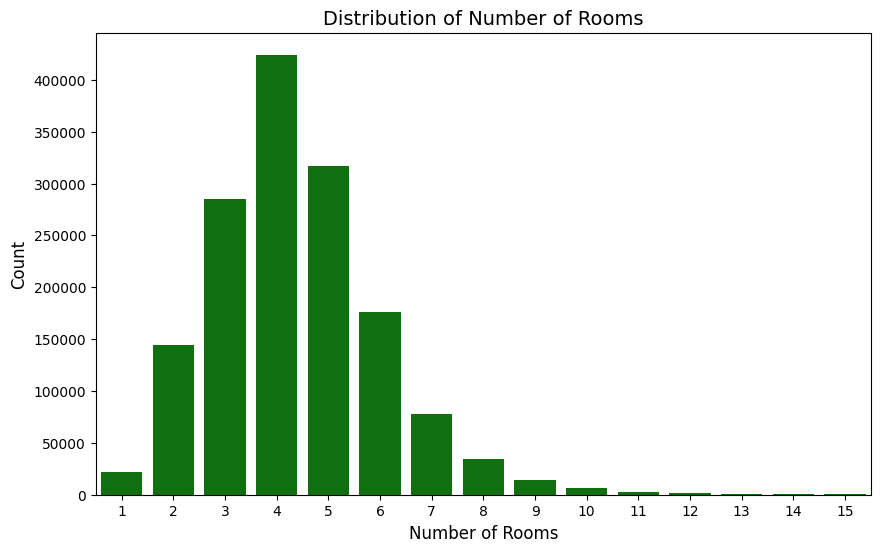

In [17]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='no_rooms', color='green')
plt.title('Distribution of Number of Rooms', fontsize=14)
plt.xlabel('Number of Rooms', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()

# VIOLIN PLOT

- Thick part: Where most houses are priced.

- Thin part: Where very few houses exist.

# HEATMAP OF CORRELATIONS

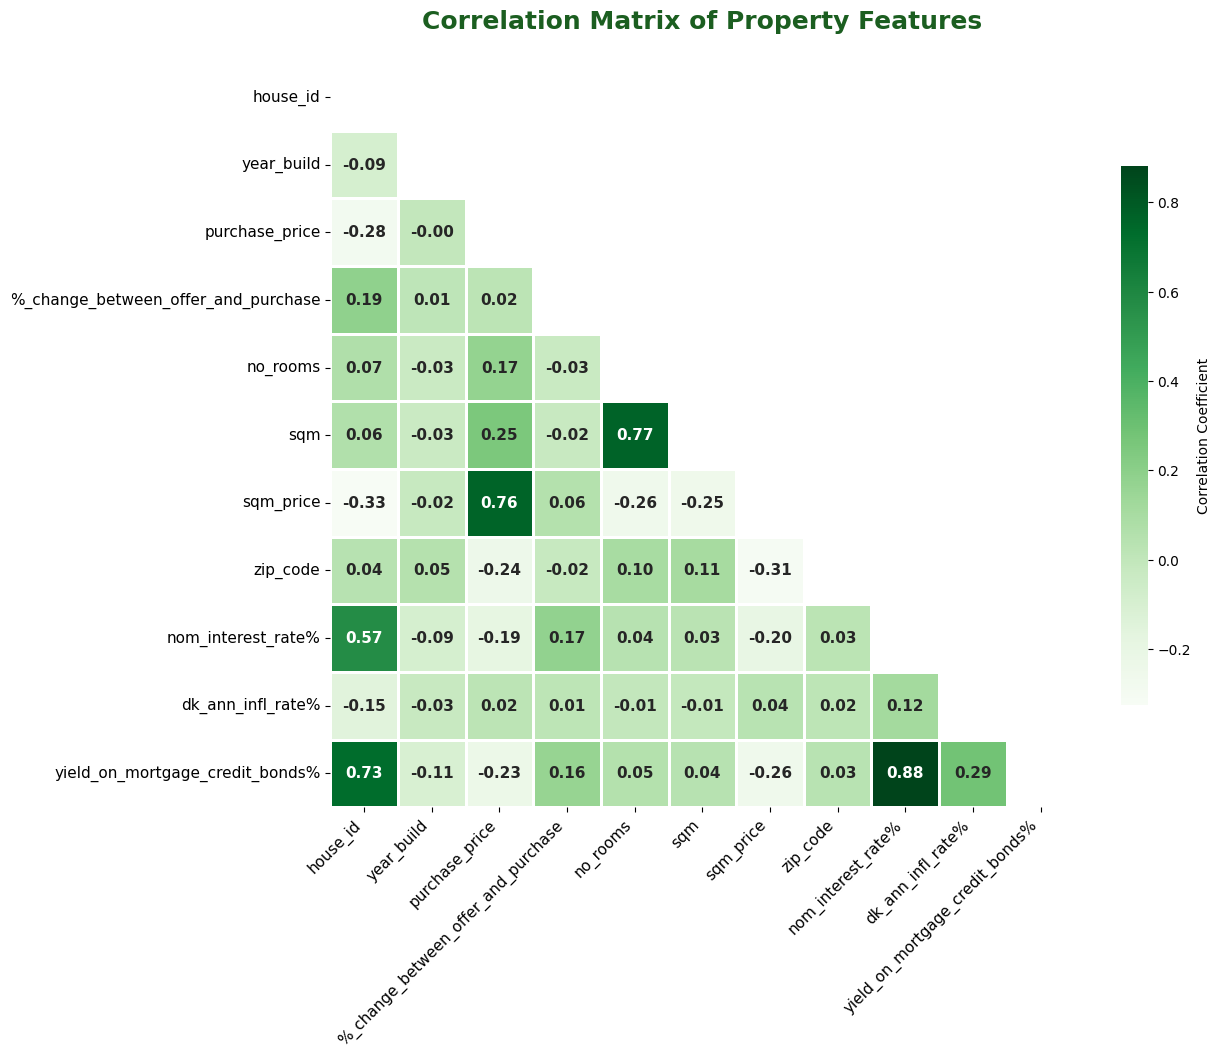

In [19]:
# 1. Prepare data
numeric_df = df.select_dtypes(include=[np.number])
corr = numeric_df.corr()

# 2. Create a "Mask" to hide the upper triangle
# This makes it much easier to read because it removes the mirrored values
mask = np.triu(np.ones_like(corr, dtype=bool))

plt.figure(figsize=(12, 10))

# 3. Use the 'Greens' palette
# 'annot_kws' makes the numbers bold and easy to see
ax = sns.heatmap(
    corr, 
    mask=mask, 
    annot=True, 
    cmap='Greens', 
    fmt='.2f', 
    linewidths=1, 
    square=True, 
    cbar_kws={'shrink': 0.7, 'label': 'Correlation Coefficient'},
    annot_kws={"size": 11, "weight": "bold"}
)

# 4. Styling
plt.title('Correlation Matrix of Property Features', fontsize=18, fontweight='bold', pad=25, color='#1b5e20')
plt.xticks(rotation=45, ha='right', fontsize=11)
plt.yticks(fontsize=11)

plt.show()

# MODEL BUILDING

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import root_mean_squared_error
from sklearn.metrics import accuracy_score

In [24]:
features = ['year_build', 'no_rooms', 'sqm', 'sqm_price', 'nom_interest_rate%', 'dk_ann_infl_rate%', 'yield_on_mortgage_credit_bonds%']

X = df[features]
y = df['purchase_price']

X = X.fillna(X.mean())

## Random Forrest

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor(n_estimators=100, random_state=42)

model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [29]:
y_pred = model.predict(X_test)

# Evaluation
rmse = root_mean_squared_error(y_test, y_pred)
print(f"Root Mean Squared Error (RMSE): {rmse}")

Root Mean Squared Error (RMSE): 14843.870556455493


In [30]:
from sklearn.model_selection import RandomizedSearchCV

param_grid = {
    'n_estimators': np.arange(50, 301, 50),
    'max_depth': np.arange(5, 21, 5),
    'min_samples_split': np.arange(2, 11, 1),
    'min_samples_leaf': np.arange(1, 11, 1),
    'max_features': ['1.0', 'sqrt', 'log2'],
    'bootstrap': [True, False]
}

In [31]:
rf = RandomForestRegressor(random_state=42)

# Randomized search on hyperparameters
random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_grid, n_iter=10, cv=3, random_state=42, n_jobs=-1, verbose=2)

random_search.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] END bootstrap=True, max_depth=20, max_features=1.0, min_samples_leaf=7, min_samples_split=3, n_estimators=100; total time=   0.3s
[CV] END bootstrap=True, max_depth=20, max_features=1.0, min_samples_leaf=10, min_samples_split=9, n_estimators=150; total time=   0.2s
[CV] END bootstrap=True, max_depth=20, max_features=1.0, min_samples_leaf=10, min_samples_split=9, n_estimators=150; total time=   0.3s
[CV] END bootstrap=True, max_depth=20, max_features=1.0, min_samples_leaf=10, min_samples_split=9, n_estimators=150; total time=   0.3s
[CV] END bootstrap=True, max_depth=20, max_features=1.0, min_samples_leaf=7, min_samples_split=3, n_estimators=100; total time=   0.1s
[CV] END bootstrap=True, max_depth=20, max_features=1.0, min_samples_leaf=7, min_samples_split=3, n_estimators=100; total time=   0.1s
[CV] END bootstrap=True, max_depth=5, max_features=sqrt, min_samples_leaf=6, min_samples_split=10, n_estimators=150; total tim

RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(random_state=42),
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': array([ 5, 10, 15, 20]),
                                        'max_features': ['1.0', 'sqrt', 'log2'],
                                        'min_samples_leaf': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
                                        'min_samples_split': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10]),
                                        'n_estimators': array([ 50, 100, 150, 200, 250, 300])},
                   random_state=42, verbose=2)

In [32]:
# Best parameters from the search
print("Best hyperparameters found: ", random_search.best_params_)

# Predictions using the best model
best_rf = random_search.best_estimator_
y_pred_tuned = best_rf.predict(X_test)

# Evaluation
rmse_tuned = root_mean_squared_error(y_test, y_pred)
print(f"Root Mean Squared Error (RMSE) after tuning: {rmse_tuned}")

Best hyperparameters found:  {'n_estimators': 50, 'min_samples_split': 7, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 20, 'bootstrap': False}
Root Mean Squared Error (RMSE) after tuning: 14843.870556455493


# PREDICTION

In [33]:
from sklearn.metrics import r2_score

# Predicting on the test set using Random Forest
y_pred_rf = model.predict(X_test)

# R² score
r2_rf = r2_score(y_test, y_pred_rf)
print(f"R² Score of Random Forest: {r2_rf:.4f}")

R² Score of Random Forest: 0.9999


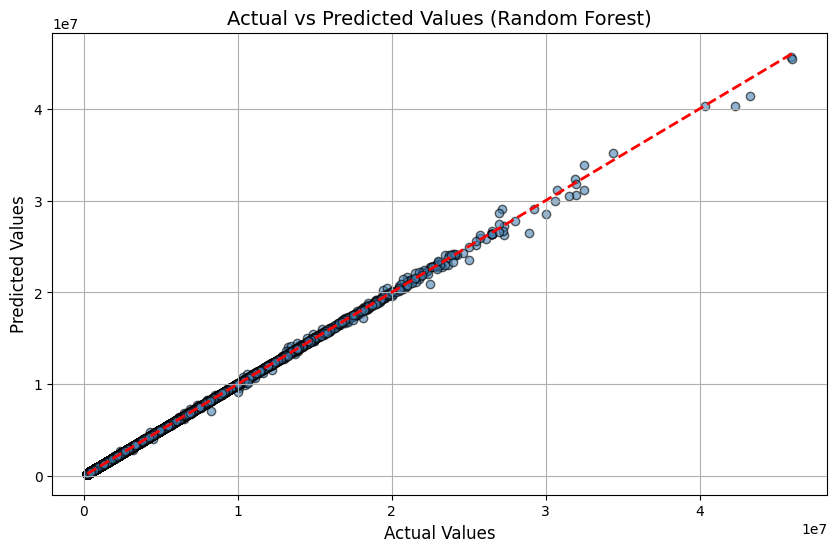

In [34]:
# Actual vs Predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_rf, color='steelblue', alpha=0.6, edgecolors='k')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', linewidth=2)
plt.title('Actual vs Predicted Values (Random Forest)', fontsize=14)
plt.xlabel('Actual Values', fontsize=12)
plt.ylabel('Predicted Values', fontsize=12)
plt.grid()
plt.show()

In [35]:
comparison_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred
})

print(comparison_df.head())

          Actual  Predicted
465021   3795000  3794920.0
742767    450000   449992.5
1167754  2122100  2120990.0
1051169  2375000  2374925.0
412051   1900000  1899550.0
